In [ ]:
#import gc
#gc.collect()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# đọc dữ liệu từ một tệp CSV
data = pd.read_csv('/content/drive/MyDrive/Colab DataMining/dataset.csv')

Xem thông tin Data Frame

In [ ]:
data.head(10)

,SourcePort,DestinationPort,NATSourcePort,NATDestinationPort,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime,pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


In [ ]:
data.shape

(65359, 12)

In [ ]:
# hiển thị thông tin cơ bản về dữ liệu trong DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65359 entries, 0 to 65358
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SourcePort          65359 non-null  int64 
 1   DestinationPort     65359 non-null  int64 
 2   NATSourcePort       65359 non-null  int64 
 3   NATDestinationPort  65359 non-null  int64 
 4   Bytes               65359 non-null  int64 
 5   BytesSent           65359 non-null  int64 
 6   BytesReceived       65359 non-null  int64 
 7   Packets             65359 non-null  int64 
 8   ElapsedTime         65359 non-null  int64 
 9   pkts_sent           65359 non-null  int64 
 10  pkts_received       65359 non-null  int64 
 11  Action              65359 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [ ]:
data.columns

Index(['SourcePort', 'DestinationPort', 'NATSourcePort', 'NATDestinationPort',
       'Bytes', 'BytesSent', 'BytesReceived', 'Packets', 'ElapsedTime',
       'pkts_sent', 'pkts_received', 'Action'],
      dtype='object')

Data preprocessing

In [ ]:
# tạo bản sao
df = data.copy()

In [ ]:
# loại bỏ khoảng trắng
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = df[i].str.strip()

In [ ]:
# Kiểm tra dữ liệu NaN trong DataFrame
nan_check = df.isna()

# In ra kết quả kiểm tra
print(nan_check)

       SourcePort  DestinationPort  NATSourcePort  NATDestinationPort  Bytes  \
0           False            False          False               False  False   
1           False            False          False               False  False   
2           False            False          False               False  False   
3           False            False          False               False  False   
4           False            False          False               False  False   
...           ...              ...            ...                 ...    ...   
65354       False            False          False               False  False   
65355       False            False          False               False  False   
65356       False            False          False               False  False   
65357       False            False          False               False  False   
65358       False            False          False               False  False   

       BytesSent  BytesReceived  Packet

In [ ]:
#Kiem tra gia tri lap
print("Dữ liệu trùng lặp:", df.duplicated().sum())

Dữ liệu trùng lặp: 8218


In [ ]:
# xóa dữ liệu bị trùng lặp
df.drop_duplicates(inplace=True)

In [ ]:
# xóa các giá trị bị thiếu (nan)
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57141 entries, 0 to 65357
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SourcePort          57141 non-null  int64 
 1   DestinationPort     57141 non-null  int64 
 2   NATSourcePort       57141 non-null  int64 
 3   NATDestinationPort  57141 non-null  int64 
 4   Bytes               57141 non-null  int64 
 5   BytesSent           57141 non-null  int64 
 6   BytesReceived       57141 non-null  int64 
 7   Packets             57141 non-null  int64 
 8   ElapsedTime         57141 non-null  int64 
 9   pkts_sent           57141 non-null  int64 
 10  pkts_received       57141 non-null  int64 
 11  Action              57141 non-null  object
dtypes: int64(11), object(1)
memory usage: 5.7+ MB


In [ ]:
df.describe()

,SourcePort,DestinationPort,NATSourcePort,NATDestinationPort,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime,pkts_sent,pkts_received
count,57141.000000,57141.000000,57141.000000,57141.000000,5.714100e+04,5.714100e+04,5.714100e+04,5.714100e+04,57141.000000,57141.000000,57141.000000
mean,50558.145815,8056.233633,22059.929648,3055.673509,1.113710e+05,2.565990e+04,8.571110e+04,1.177648e+02,75.154670,47.302252,70.462558
std,13837.429299,16516.338401,22142.030684,10365.947000,6.016715e+06,4.099585e+06,2.637697e+06,5.496829e+03,322.596715,3447.084320,2380.857569
min,5.000000,1.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49454.000000,53.000000,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,54021.000000,443.000000,16393.000000,53.000000,1.930000e+02,9.400000e+01,9.000000e+01,2.000000e+00,26.000000,1.000000,1.000000
75%,58580.000000,445.000000,41895.000000,443.000000,1.142000e+03,5.110000e+02,6.690000e+02,1.000000e+01,31.000000,5.000000,4.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [ ]:
#kiểm tra xem có bất kỳ giá trị nào bị thiếu
df.isnull().any().any()

False

<Axes: >

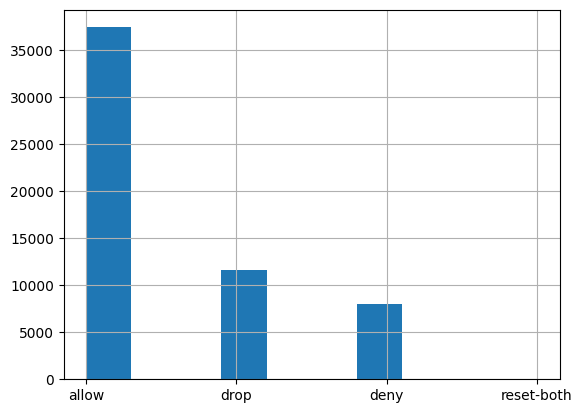

In [ ]:
df["Action"].hist()

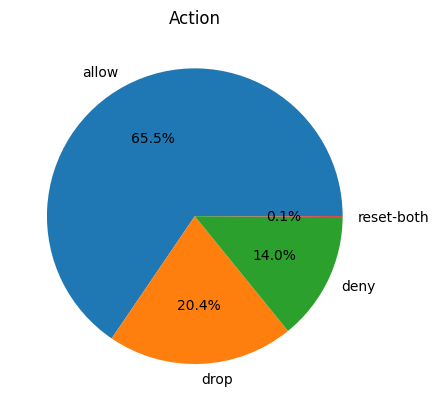

In [ ]:
#biểu đồ hình tròn thể hiện sự phân bổ các giá trị
labels = df.Action.value_counts().index
plt.pie(df.Action.value_counts(), labels=labels, autopct='%1.1f%%', shadow=False)
plt.title('Action')
plt.show()

In [ ]:
#đếm số lần xuất hiện của từng giá trị duy nhất trong cột
action_counts = df['Action'].value_counts()
print(action_counts)

allow         37424
drop          11635
deny           8028
reset-both       54
Name: Action, dtype: int64


In [ ]:
# Tạo một ánh xạ từ giá trị chữ thành số
custom_mapping = {'allow': 0, 'drop': 1, 'deny': 2, 'reset-both': 3}

# Sử dụng phương thức .map() để ánh xạ giá trị trong cột 'Action' thành số
df['Action'] = df['Action'].map(custom_mapping)
df.head()

,SourcePort,DestinationPort,NATSourcePort,NATDestinationPort,Bytes,BytesSent,BytesReceived,Packets,ElapsedTime,pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,0
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,0
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,0
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,0
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,0


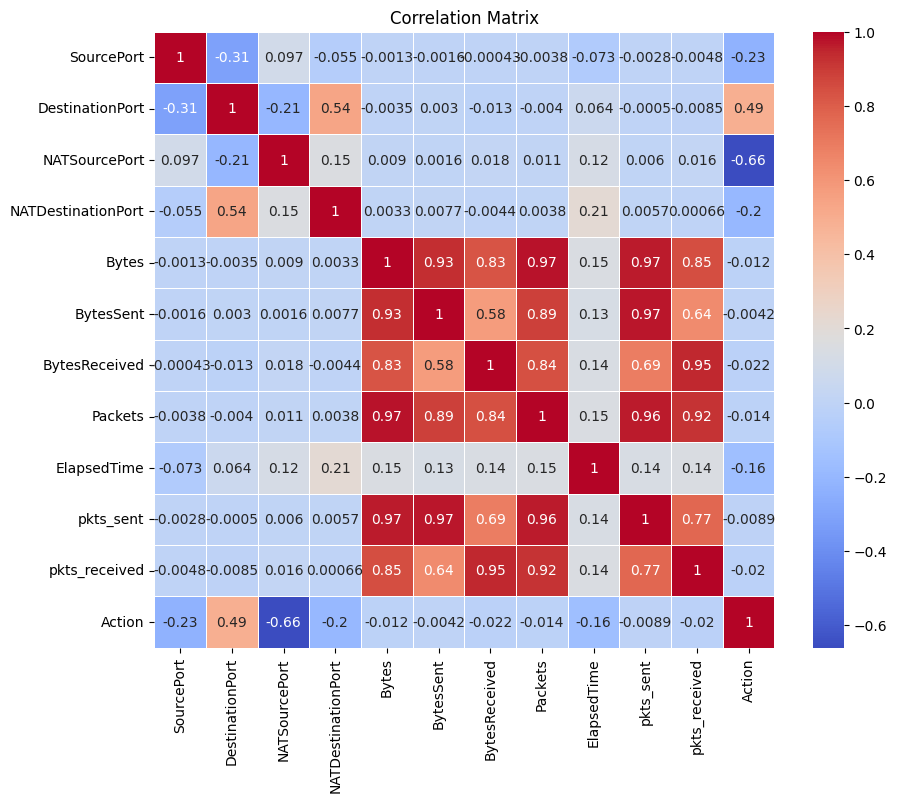

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo ma trận tương quan
correlation_matrix = df.corr(numeric_only=True)

# Vẽ biểu đồ ma trận tương quan sử dụng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

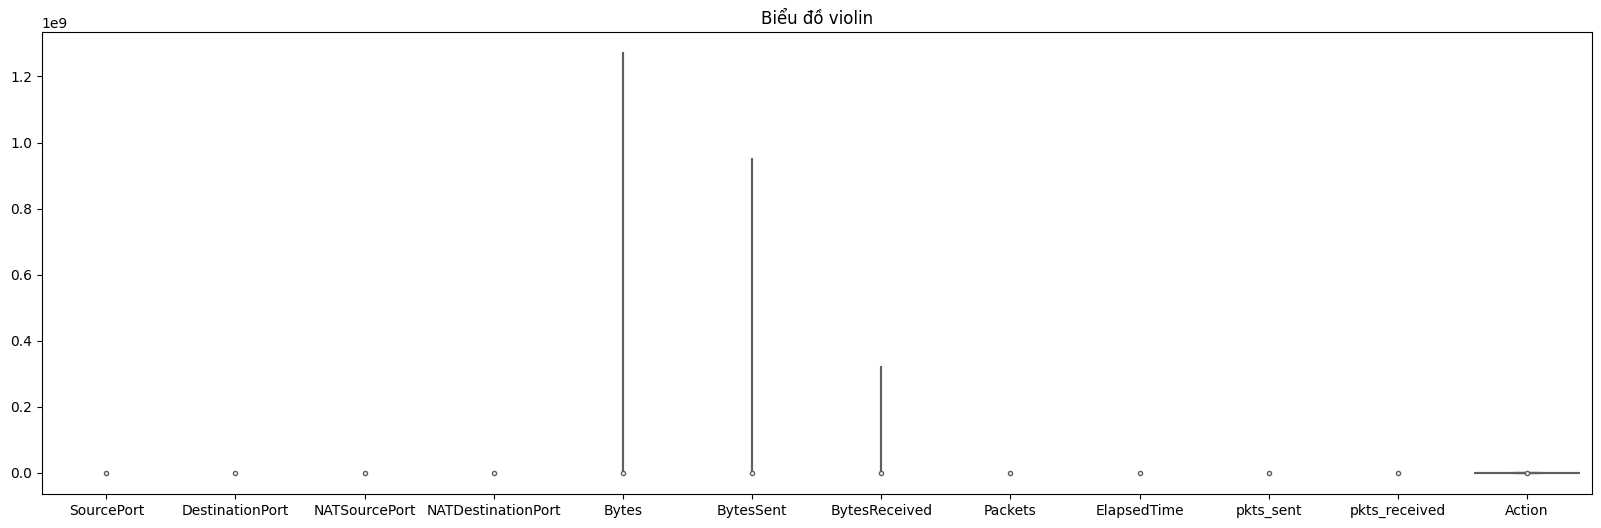

In [ ]:
#trực quan hóa việc phân bổ dữ liệu giữa các danh mục khác nhau
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo một kích thước tùy ý cho biểu đồ
plt.figure(figsize=(20, 6))

sns.violinplot(data=df, palette="Set3")
plt.title('Biểu đồ violin')

plt.show()

In [ ]:
df.columns

Index(['SourcePort', 'DestinationPort', 'NATSourcePort', 'NATDestinationPort',
       'Bytes', 'BytesSent', 'BytesReceived', 'Packets', 'ElapsedTime',
       'pkts_sent', 'pkts_received', 'Action'],
      dtype='object')

In [ ]:
#xóa cột thuộc tính
df = data.drop(['NATSourcePort', 'NATDestinationPort', 'Packets', 'pkts_sent','pkts_received'], axis = 1)

In [ ]:
df.head(15)

,SourcePort,DestinationPort,Bytes,BytesSent,BytesReceived,ElapsedTime,Action
0,57222,53,177,94,83,30,allow
1,56258,3389,4768,1600,3168,17,allow
2,6881,50321,238,118,120,1199,allow
3,50553,3389,3327,1438,1889,17,allow
4,50002,443,25358,6778,18580,16,allow
5,51465,443,3961,1595,2366,16,allow
6,60513,47094,320,140,180,7,allow
7,50049,443,7912,3269,4643,96,allow
8,52244,58774,70,70,0,5,allow
9,50627,443,8256,1674,6582,75,allow


Chuẩn hóa dữ liệu

In [ ]:
# in 80 giá trị thường xuyên nhất và số lượng của chúng cho mỗi cột trong DataFrame
top_80_values = {}

for column in df.columns:
    counts = df[column].value_counts().head(80).to_dict()
    top_80_values[column] = counts

# In ra top 80 giá trị nhiều nhất cho từng cột
for column, counts in top_80_values.items():
    print(f"Top 80 values for Column: {column}")
    for value, count in counts.items():
        print(f"Value: {value}, Count: {count}")
    print('\n')

Top 80 values for Column: SourcePort
Value: 58638, Count: 840
Value: 27005, Count: 513
Value: 443, Count: 273
Value: 57470, Count: 222
Value: 49418, Count: 210
Value: 6881, Count: 177
Value: 50584, Count: 116
Value: 3478, Count: 105
Value: 26900, Count: 102
Value: 5588, Count: 87
Value: 42298, Count: 84
Value: 48817, Count: 82
Value: 45941, Count: 77
Value: 50265, Count: 75
Value: 16387, Count: 73
Value: 37965, Count: 72
Value: 45964, Count: 68
Value: 1024, Count: 67
Value: 6666, Count: 53
Value: 30960, Count: 53
Value: 11136, Count: 47
Value: 80, Count: 46
Value: 51221, Count: 46
Value: 48706, Count: 46
Value: 5223, Count: 46
Value: 49160, Count: 37
Value: 65189, Count: 36
Value: 45908, Count: 35
Value: 123, Count: 34
Value: 2267, Count: 33
Value: 15503, Count: 32
Value: 57131, Count: 32
Value: 19875, Count: 31
Value: 13285, Count: 30
Value: 44847, Count: 29
Value: 1025, Count: 28
Value: 30188, Count: 28
Value: 6882, Count: 28
Value: 8889, Count: 27
Value: 57987, Count: 27
Value: 4020

In [ ]:
#đặt giá trị ngưỡng
threshold = 60000
df_cleaned = df[df['SourcePort'] <= threshold]

threshold = 65000
df_cleaned = df[df['DestinationPort'] <= threshold]

threshold = 1000
df_cleaned = df[df['Bytes'] <= threshold]

threshold = 2000
df_cleaned = df[df['BytesSent'] <= threshold]

threshold = 7000
df_cleaned = df[df['BytesReceived'] <= threshold]

threshold = 2000
df_cleaned = df[df['ElapsedTime'] <= threshold]

In [ ]:
# xóa các giá trị bị thiếu (nan)
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 0 to 65357
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SourcePort       54504 non-null  int64 
 1   DestinationPort  54504 non-null  int64 
 2   Bytes            54504 non-null  int64 
 3   BytesSent        54504 non-null  int64 
 4   BytesReceived    54504 non-null  int64 
 5   ElapsedTime      54504 non-null  int64 
 6   Action           54504 non-null  object
dtypes: int64(6), object(1)
memory usage: 3.3+ MB


In [ ]:
df.head(10)

,SourcePort,DestinationPort,Bytes,BytesSent,BytesReceived,ElapsedTime,Action
0,57222,53,177,94,83,30,allow
1,56258,3389,4768,1600,3168,17,allow
2,6881,50321,238,118,120,1199,allow
3,50553,3389,3327,1438,1889,17,allow
4,50002,443,25358,6778,18580,16,allow
5,51465,443,3961,1595,2366,16,allow
6,60513,47094,320,140,180,7,allow
7,50049,443,7912,3269,4643,96,allow
8,52244,58774,70,70,0,5,allow
9,50627,443,8256,1674,6582,75,allow


In [ ]:
#thay thế cái giá trị thành số
df['Action'] = df['Action'].replace('allow',0)
df['Action'] = df['Action'].replace('deny',1)
df['Action'] = df['Action'].replace('drop',2)
df['Action'] = df['Action'].replace('reset-both',3)

In [ ]:
df.columns

Index(['SourcePort', 'DestinationPort', 'Bytes', 'BytesSent', 'BytesReceived',
       'ElapsedTime', 'Action'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Tạo một instance của MinMaxScaler với khoảng biến đổi là [0, 100]
min_max_scaler = MinMaxScaler(feature_range=(0, 100))

# Chuẩn hóa cột chỉ định
df['SourcePort'] = min_max_scaler.fit_transform(df[['SourcePort']]).round(6)
df['DestinationPort'] = min_max_scaler.fit_transform(df[['DestinationPort']]).round(6)
df['Bytes'] = min_max_scaler.fit_transform(df[['Bytes']]).round(6)
df['BytesSent'] = min_max_scaler.fit_transform(df[['BytesSent']]).round(6)
df['BytesReceived'] = min_max_scaler.fit_transform(df[['BytesReceived']]).round(6)
df['ElapsedTime'] = min_max_scaler.fit_transform(df[['ElapsedTime']]).round(6)
# In ra kết quả
df.head()

,SourcePort,DestinationPort,Bytes,BytesSent,BytesReceived,ElapsedTime,Action
0,87.315540,0.079348,0.000009,0.000004,0.000026,0.277162,0
1,85.844435,5.169836,0.000371,0.000162,0.000987,0.157058,0
2,10.493064,76.784570,0.000014,0.000006,0.000037,11.077236,0
3,77.138366,5.169836,0.000257,0.000145,0.000589,0.157058,0
4,76.297517,0.674459,0.001993,0.000708,0.005790,0.147820,0


Huấn luyện mô hình

In [ ]:
# Huấn luyện
X = df.drop('Action', axis=1)
y = df['Action']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree**


*   Sau khi **train** dữ liệu ta vô bắt đầu vô mô hình, đầu tiên là **Decision Tree**
*   Tiếp theo tính độ quan trọng của các thuộc tính trong một mô hình Decision Tree.
*   Chọn thuộc tính gốc dựa trên độ quan trọng của chúng.

1. Tính năng gốc: ElapsedTime

2. Giá trị độ quan trọng của các thuộc tính : [2.76452370e-03 3.33727966e-01 2.94404927e-04 1.73203220e-04
 1.30657518e-02 6.49974151e-01]

3. Tính năng gốc được chọn: ElapsedTime


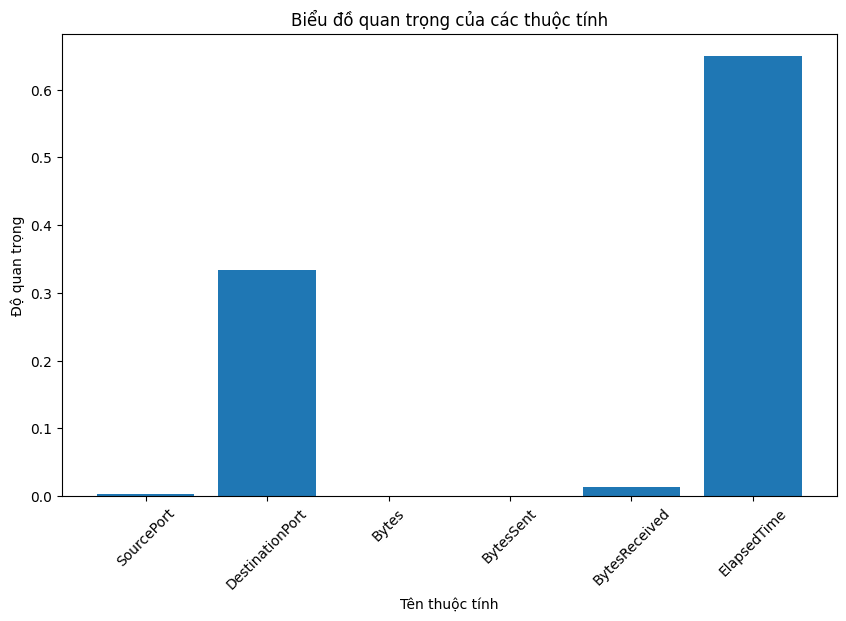

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Tạo mô hình cây quyết định và huấn luyện nó trên dữ liệu
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Độ quan trọng của các thuộc tính
feature_importances = clf.feature_importances_
feature_names = list(X.columns)  # Thay thế bằng tên các thuộc tính trong dữ liệu của bạn

# 3. Chọn thuộc tính gốc dựa trên độ quan trọng
root_feature_index = feature_importances.argmax()
root_feature_name = feature_names[root_feature_index]

# 5. In kết quả
print(f"1. Tính năng gốc: {root_feature_name}\n")
print(f"2. Giá trị độ quan trọng của các thuộc tính : {feature_importances}\n")
print(f"3. Tính năng gốc được chọn: {root_feature_name}")

# Vẽ biểu đồ cột độ quan trọng của các thuộc tính
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.xlabel('Tên thuộc tính')
plt.ylabel('Độ quan trọng')
plt.title('Biểu đồ quan trọng của các thuộc tính')
plt.xticks(rotation=45)  # Để tên thuộc tính nghiêng 45 độ để dễ đọc
plt.show()

In [ ]:
# Tạo danh sách các giá trị max_depth bạn muốn thử
max_depth_values = list(range(3, 16))

# Tạo một danh sách để lưu MSE tương ứng với mỗi max_depth
mse_values = []

# Lặp qua từng giá trị max_depth và tính MSE
for max_depth in max_depth_values:
    # Tạo mô hình Decision Tree với max_depth cụ thể
    model = DecisionTreeRegressor(max_depth=max_depth)

    # Đào tạo mô hình trên dữ liệu đào tạo
    model.fit(X_train, y_train)

    # Dự đoán kết quả trên dữ liệu kiểm tra
    y_pred = model.predict(X_test)

    # Tính MSE và lưu vào danh sách
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Tìm chỉ mục của MSE tốt nhất
best_mse_index = mse_values.index(min(mse_values))

# Lấy max_depth tương ứng với MSE tốt nhất
best_max_depth = max_depth_values[best_mse_index]

# Lấy MSE tốt nhất
best_mse = mse_values[best_mse_index]

# Hiển thị danh sách max_depth và MSE tương ứng
for max_depth, mse in zip(max_depth_values, mse_values):
    print(f"max_depth = {max_depth}, MSE = {mse}")

# In ra max_depth và MSE tốt nhất
print(f"Max_depth tốt nhất: {best_max_depth}")
print(f"MSE tốt nhất: {best_mse}")

max_depth = 3, MSE = 0.007501949333544895
max_depth = 4, MSE = 0.00399369003007711
max_depth = 5, MSE = 0.004018230757585815
max_depth = 6, MSE = 0.00339742363921644
max_depth = 7, MSE = 0.004067280933972114
max_depth = 8, MSE = 0.003117870734991703
max_depth = 9, MSE = 0.0032430060247504305
max_depth = 10, MSE = 0.003318468027991846
max_depth = 11, MSE = 0.005357405809822901
max_depth = 12, MSE = 0.005551926351811351
max_depth = 13, MSE = 0.005916431992273475
max_depth = 14, MSE = 0.006284576426584737
max_depth = 15, MSE = 0.006213827169099801
Max_depth tốt nhất: 8
MSE tốt nhất: 0.003117870734991703


In [ ]:
#huấn luyện cây quyết định trên tập huấn luyện
clf = DecisionTreeRegressor(max_depth=best_max_depth)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

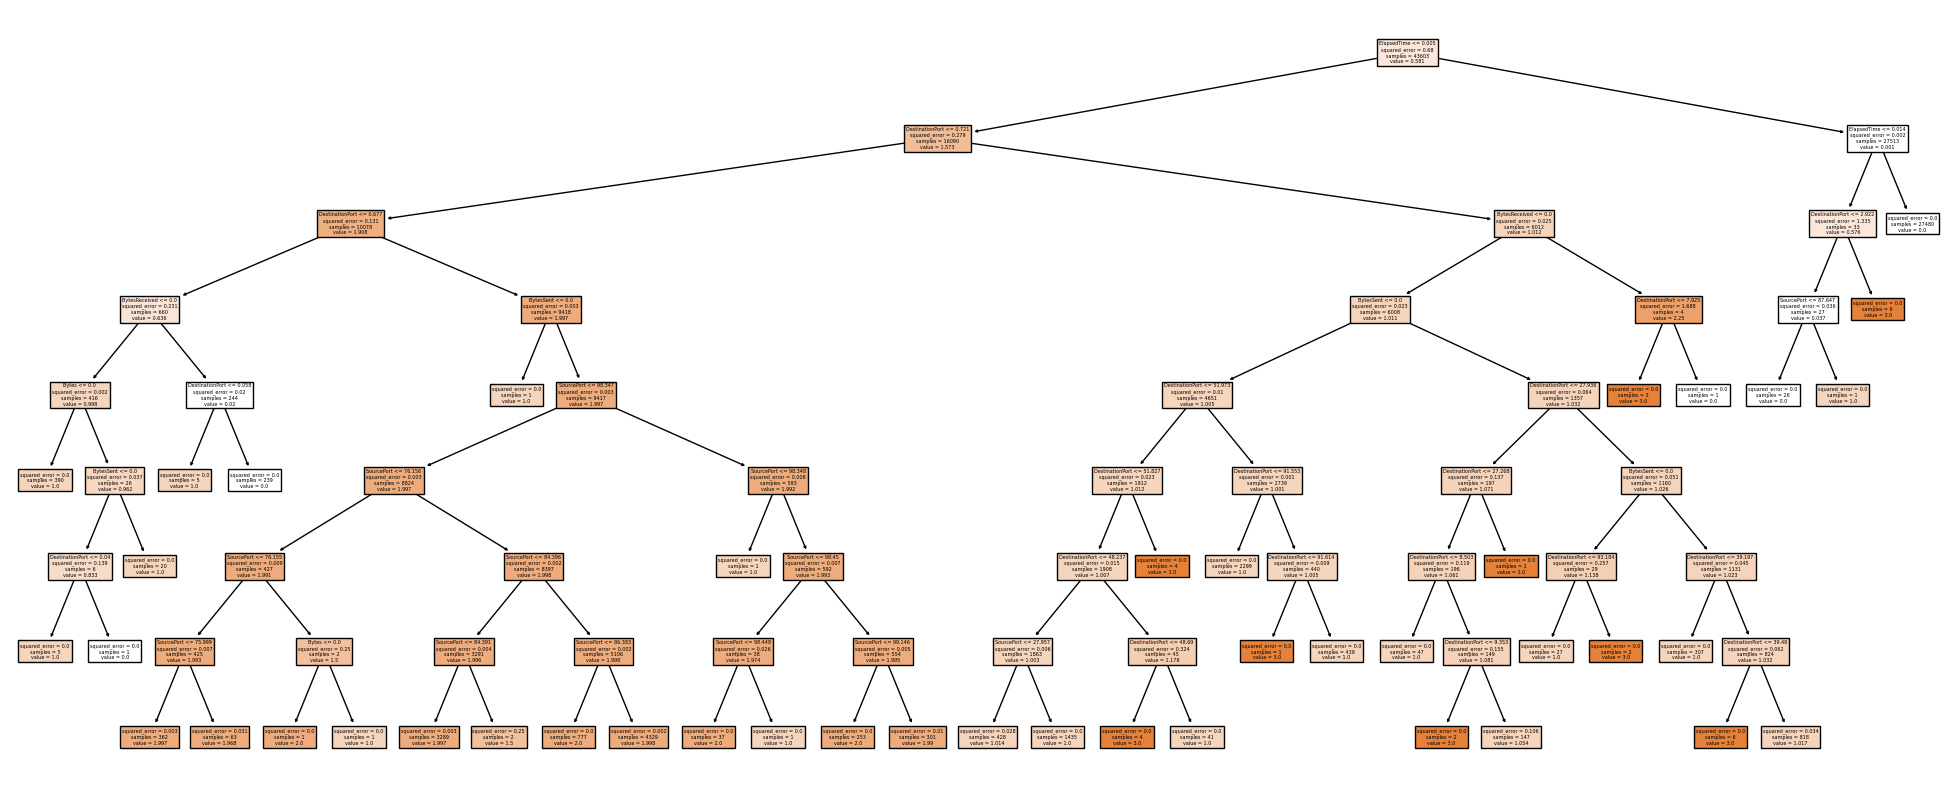

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plot_tree(clf, filled=True, feature_names=X.columns, ax=ax)

# Lưu hình ảnh với tên tệp và định dạng ảnh mong muốn (ví dụ: PNG)
plt.savefig("decision_tree.png")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7040
           1       0.99      0.99      0.99      1603
           2       1.00      0.99      1.00      2247
           3       0.50      0.45      0.48        11

    accuracy                           1.00     10901
   macro avg       0.87      0.86      0.86     10901
weighted avg       1.00      1.00      1.00     10901

accuracy:0.99669755


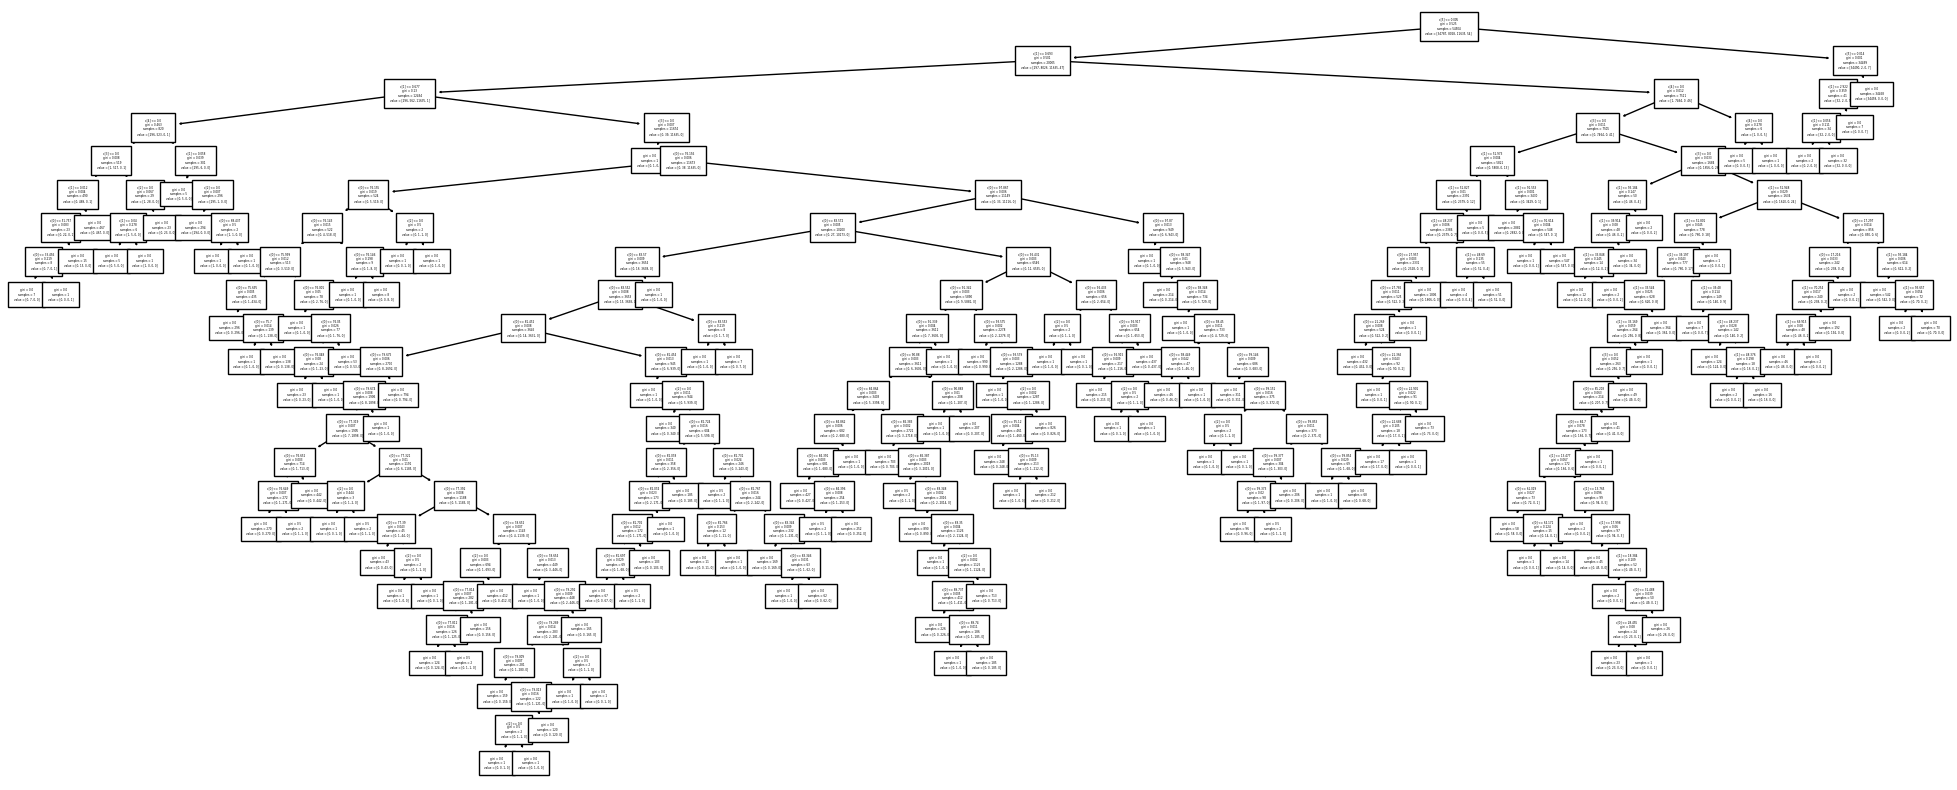

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_forecast=dt.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, dt.predict(X_test)))
print('accuracy:{:.8f}'.format(dt.score(X_test, y_test)))

#trực quan hóa cây quyết định
from sklearn import tree
plt.figure(figsize=(25,10))
temp = tree.plot_tree(dt.fhttps://github.com/HaiDua/DoAn_DataMining.gitit(X,y), fontsize=2)
plt.show()

In [ ]:
# xác thực chéo 10 lần và sau đó tính giá trị trung bình của điểm xác thực chéo
from sklearn.model_selection import cross_val_score
scores_DT = cross_val_score(dt, X, y, cv=10)
print(scores_DT)
print('Giá trị trung bình của Cây quyết định:', scores_DT.mean())

[0.99596404 0.9965144  0.99504678 0.99871583 0.98256881 0.99853211
 0.9987156  0.99669725 0.99743119 0.99706422]
Giá trị trung bình của Cây quyết định: 0.9957250230998772


**Random Forest**

In [ ]:
#Tạo danh sách các giá trị n_estimators bạn muốn kiểm tra
n_estimators_values = list(range(10, 201, 20))

best_n_estimators = None
best_mean_score = -1

# Tạo một mô hình Random Forest và sử dụng cross-validation để đánh giá hiệu suất
for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators)
    scores = cross_val_score(model, X, y, cv=5)  # X và y là dữ liệu huấn luyện
    mean_score = np.mean(scores)

    if mean_score > best_mean_score:
        best_n_estimators = n_estimators
        best_mean_score = mean_score

    print(f"n_estimators: {n_estimators} - độ kiểm tra trung bình: {mean_score}")

print(f"Giá trị tốt nhất: n_estimators={best_n_estimators}, mean_score={best_mean_score}")

n_estimators: 10 - độ kiểm tra trung bình: 0.9900742630294838
n_estimators: 30 - độ kiểm tra trung bình: 0.990165994366311
n_estimators: 50 - độ kiểm tra trung bình: 0.9901292988018101
n_estimators: 70 - độ kiểm tra trung bình: 0.9901109518611625
n_estimators: 90 - độ kiểm tra trung bình: 0.9900559110392196
n_estimators: 110 - độ kiểm tra trung bình: 0.9900559093560141
n_estimators: 130 - độ kiểm tra trung bình: 0.9900559093560141
n_estimators: 150 - độ kiểm tra trung bình: 0.9900742562966617
n_estimators: 170 - độ kiểm tra trung bình: 0.9900375624153664
n_estimators: 190 - độ kiểm tra trung bình: 0.9900926049205149
Giá trị tốt nhất: n_estimators=30, mean_score=0.990165994366311


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Tạo một instance của Random Forest classifier
rf = RandomForestClassifier(n_estimators=170, random_state=42)  # Số cây quyết định (n_estimators) là 100, có thể điều chỉnh theo nhu cầu

# Huấn luyện mô hình trên dữ liệu huấn luyện
rf.fit(X_train, y_train.ravel())

# Dự đoán trên dữ liệu kiểm tra
y_forecast = rf.predict(X_test)
scores_RDF = cross_val_score(rf, X, y, cv=10)
# Tạo báo cáo đánh giá mô hình
print(classification_report(y_test, rf.predict(X_test)))

# In độ chính xác của mô hình
print('accuracy: {:.4f}\n'.format(rf.score(X_test, y_test)))
####
print(scores_RDF)
print('Giá trị trung bình của RandomForest :', scores_RDF.mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7040
           1       0.99      0.99      0.99      1603
           2       1.00      1.00      1.00      2247
           3       0.80      0.36      0.50        11

    accuracy                           1.00     10901
   macro avg       0.95      0.84      0.87     10901
weighted avg       1.00      1.00      1.00     10901

accuracy: 0.9972

[0.99541369 0.99798202 0.96110805 0.99834893 0.9587156  0.99889908
 0.99889908 0.99724771 0.99798165 0.99706422]
Giá trị trung bình của RandomForest : 0.9901660027029802


**Naive Bayes**

In [ ]:
# Tạo danh sách để lưu trữ model và srore
best_score = 0
best_model = None
scores = []

#lặp mô hình trên tập huấn luyện và giá hiệu suất của mô hình trên tập dữ liệu kiểm tra
for i in range(10):
    nb = GaussianNB()

    nb.fit(X_train, y_train.ravel())
    accuracy = nb.score(X_test, y_test)
    scores.append(accuracy)
    y_forecast=nb.predict(X_test)
    if accuracy > best_score:
        best_score = accuracy
        best_model = nb

for i, score in enumerate(scores):
    print(f'Model {i + 1} Accuracy: {score:.4f}')

# In độ chính xác của mô hình tốt nhất
print(f'Best Model Accuracy: {best_score:.4f}\n')
print(classification_report(y_test, nb.predict(X_test)))
print('Best Model:', best_model)

Model 1 Accuracy: 0.9922
Model 2 Accuracy: 0.9922
Model 3 Accuracy: 0.9922
Model 4 Accuracy: 0.9922
Model 5 Accuracy: 0.9922
Model 6 Accuracy: 0.9922
Model 7 Accuracy: 0.9922
Model 8 Accuracy: 0.9922
Model 9 Accuracy: 0.9922
Model 10 Accuracy: 0.9922
Best Model Accuracy: 0.9922

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7040
           1       0.98      0.99      0.99      1603
           2       0.98      1.00      0.99      2247
           3       0.11      0.09      0.10        11

    accuracy                           0.99     10901
   macro avg       0.77      0.77      0.77     10901
weighted avg       0.99      0.99      0.99     10901

Best Model: GaussianNB()


Độ chính xác của 3 thuật toán

In [ ]:
print('Độ chính xác của Decision Tree:', scores_DT.mean())
print('Độ chính xác của RandomForest:', scores_RDF.mean())
print(f'Độ chính xác của Naive Bayes {best_score:.4f}\n')

Độ chính xác của Decision Tree: 0.9957250230998772
Độ chính xác của RandomForest: 0.9901660027029802
Độ chính xác của Naive Bayes 0.9922



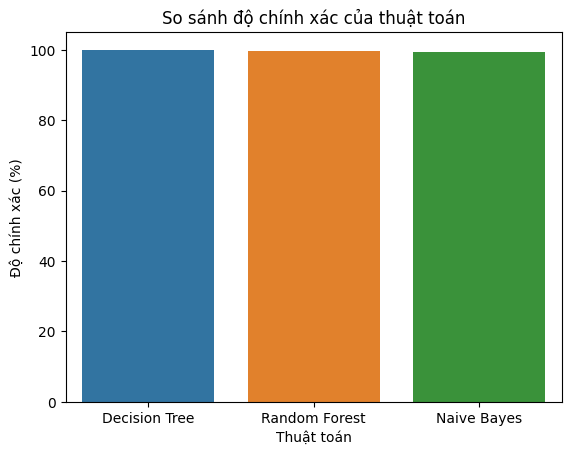

In [ ]:
DT = dt.score(X_test, y_test)*100
RDF = rf.score(X_test, y_test)*100
NB = nb.score(X_test, y_test)*100

# Định nghĩa tên và giá trị của các thuật toán
labels = ['Decision Tree', 'Random Forest', 'Naive Bayes']
scores = [DT, RDF, NB]

# Tạo DataFrame từ labels và scores
data = {'Thuật toán': labels, 'Độ chính xác (%)': scores}
df = pd.DataFrame(data)

# Vẽ biểu đồ
sns.barplot(x='Thuật toán', y='Độ chính xác (%)', data=df)
plt.xlabel('Thuật toán')
plt.ylabel('Độ chính xác (%)')
plt.title('So sánh độ chính xác của thuật toán')
plt.show()

Test với dữ liệu mới

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Tải mô hình đã đào tạo (đã đào tạo trước đó)
model = DecisionTreeClassifier()  # Use Decision Tree classifier

# Đọc tập dữ liệu ban đầu
original_data = pd.read_csv('/content/drive/MyDrive/Colab DataMining/taptest.csv')  # Thay 'original_data.csv' bằng tên tập dữ liệu của bạn

# Lấy 200 dòng đầu tiên của dữ liệu ban đầu
X_original = original_data.drop('Action', axis=1)  # Xóa cột mục tiêu
X_new = X_original.iloc[:200]  # Chọn 200 dòng đầu tiên

# Đọc cột mục tiêu (nếu có) cho 200 dòng đầu tiên
y_original = original_data['Action']  # Thay 'target_column' bằng tên cột mục tiêu
y_new = y_original.iloc[:200]  # Chọn 200 dòng đầu tiên

# Đào tạo mô hình Decision Tree trên dữ liệu ban đầu
model.fit(X_original, y_original)

# Dự đoán với dữ liệu mới
predictions = model.predict(X_new)

# Kết quả dự đoán cho 200 dòng đầu tiên
print(predictions)

['allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'allow'
 'allow' 'allow' 'allow' 'allow' 'allow' 'allow' 'a

In [ ]:
# Đánh giá độ chính xác của mô hình Decision Tree trên tập test (nếu cần)
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_new, predictions)
print(f'Accuracy of Decision Tree on Test Set: {dt_accuracy}')

Accuracy of Decision Tree on Test Set: 0.945
